In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import numpy as np

from lint_analysis.bin_counts.models import BinCount

In [3]:
series = BinCount.token_series('random')

In [4]:
from joblib import Memory

mem = Memory('cache')

token_counts = mem.cache(BinCount.token_counts)

tokens = token_counts(10000)

In [ ]:
data = []

for i, (token, count) in enumerate(tokens.items()):
    
    series = BinCount.token_series(token)
    
    data.append(dict(
        token=token,
        count=count,
        variance=series.var()
    ))
    
    if i % 100 == 0:
        print(i)

In [6]:
import pandas as pd

df = pd.DataFrame(data)

In [39]:
uni_x = [10000, 200000]
uni_y = [n * (1/100) * (1 - 1/100) for n in uni_x]

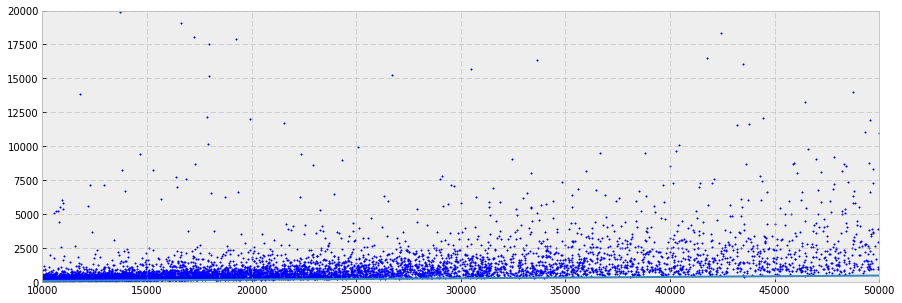

In [70]:
plt.figure(figsize=(15, 5))
plt.xlim(10000, 50000)
plt.ylim(0, 20000)
plt.scatter(df['count'], df['variance'], s=2, c='b')
plt.plot(uni_x, uni_y)
plt.show()